# Workflow for the EnergyLand energy system

In this application of the ETHOS.FINE framework, a single node energy system is modeled and optimized.
Compared to the previous examples, this example includes a lot more technologies considered in the system. 

The workflow is structures as follows:
1. Required packages are imported and the input data path is set
2. An energy system model instance is created
3. Commodity sources are added to the energy system model
4. Commodity conversion components are added to the energy system model
5. Commodity storages are added to the energy system model
6. Commodity sinks are added to the energy system model
7. The energy system model is optimized
8. Selected optimization results are presented

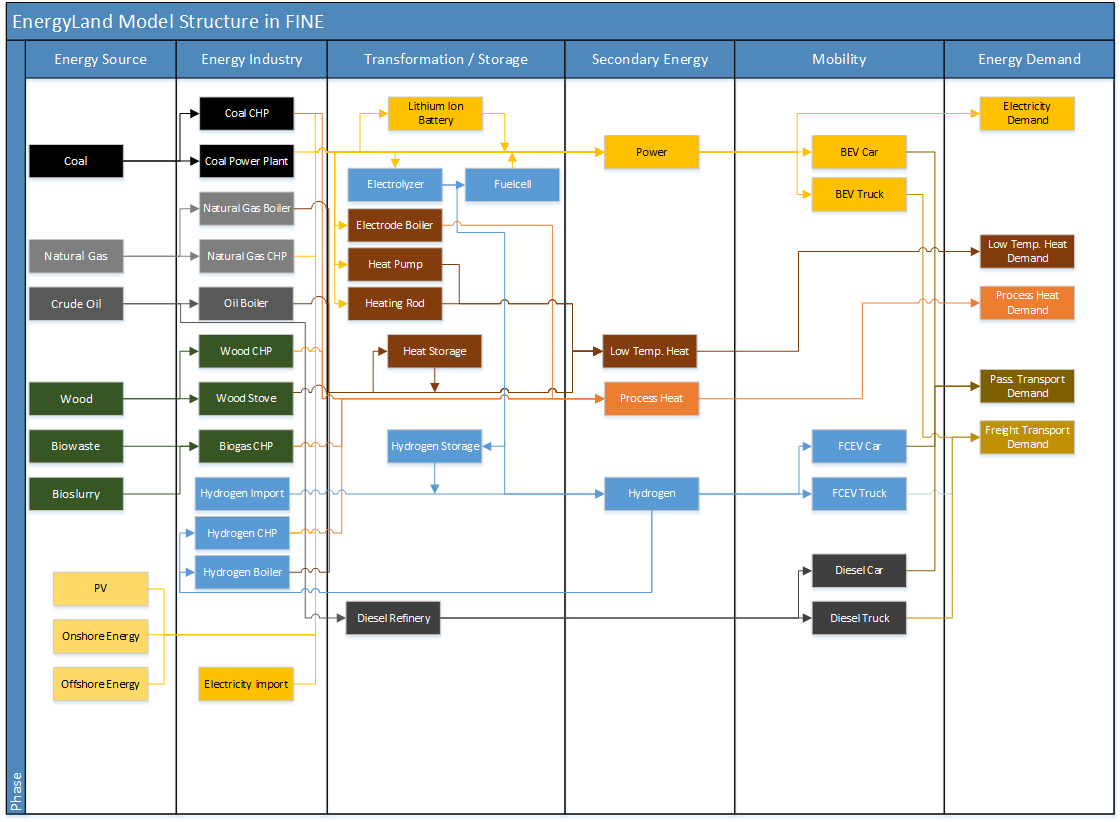

In [1]:
from IPython.display import Image
from pathlib import Path

Image(Path("images/strukturExample.png"))

# 1. Import packages

The FINE framework is imported which provides the required classes and functions for modeling the energy system.
The working directory and the underlying excelfile which provides some of the input data is imported.

In [2]:
import fine as fn
from getData import getData
import pandas as pd
import os

cwd = os.getcwd()
data = getData()

# 2. Set up energy system model instance

The structure of the energy system model is given by the considered locations, in this case we consider only one location (EnergyLand), commodities, the number of time steps as well as the hours per time step.

The commodities are specified by a unit, which can be given as an energy or mass unit per hour.

In [3]:
locations = {"EnergyLand"}
commodityUnitDict = {
    "electricity": r"GW$_{el}$",
    "hydrogen": r"GW$_{H_{2},LHV}$",
    "nGas": r"GW$_{CH4}$",
    "coal": r"GW$_{coal}$",
    "PHeat": r"GW$_{Pheat}$",
    "LTHeat": r"GW$_{LTHeat}$",
    "CO2": r"kt$_{CO_{2}}$/h",
    "pTransport": "Mio pkm/h",
    "fTransport": "Mio tkm/h",
    "crudeOil": r"GW$_{Oil}$",
    "wood": r"GW$_{wood}$",
    "biowaste": r"GW$_{biowaste}$",
    "bioslurry": r"GW$_{bioslurry}$",
    "diesel": r"GW$_{diesel}$",
    "biogas": r"GW$_{CH4}$",
    "nGasImp": r"GW$_{CH4}$",
}
commodities = {
    "electricity",
    "hydrogen",
    "nGas",
    "coal",
    "PHeat",
    "LTHeat",
    "CO2",
    "pTransport",
    "fTransport",
    "crudeOil",
    "wood",
    "biowaste",
    "bioslurry",
    "diesel",
    "nGasImp",
    "biogas",
}
numberOfTimeSteps = 8760
hoursPerTimeStep = 1

In [4]:
esM = fn.EnergySystemModel(
    locations=locations,
    commodities=commodities,
    numberOfTimeSteps=8760,
    commodityUnitsDict=commodityUnitDict,
    hoursPerTimeStep=1,
    costUnit="1e6 Euro",
    lengthUnit="km",
    verboseLogLevel=0,
)

# 3. Sources

Source components transfer a commodity from outside the system boundary of EnergyLand into the system.

## 3.1 Electricity sources

### Wind turbines

#### Onshore Wind Turbines

In [5]:
esM.add(
    fn.Source(
        esM=esM,
        name="Wind_Onshore",
        commodity="electricity",
        hasCapacityVariable=True,
        operationRateMax=data["Wind_onshore, operationRateMax"],
        capacityMax=data["Wind_onshore, capacityMax"],
        investPerCapacity=1250,
        opexPerCapacity=1250 * 0.02,
        interestRate=0.08,
        economicLifetime=20,
    )
)

#### Offshore Wind Turbines

In [6]:
esM.add(
    fn.Source(
        esM=esM,
        name="Wind_Offshore",
        commodity="electricity",
        hasCapacityVariable=True,
        operationRateMax=data["Wind_offshore, operationRateMax"],
        capacityMax=data["Wind_offshore, capacityMax"],
        investPerCapacity=2530,
        opexPerCapacity=2530 * 0.045,
        interestRate=0.08,
        economicLifetime=20,
    )
)

### Photovoltaic

In [7]:
esM.add(
    fn.Source(
        esM=esM,
        name="PV",
        commodity="electricity",
        hasCapacityVariable=True,
        operationRateMax=data["PV, operationRateMax"],
        capacityMax=data["PV, capacityMax"],
        investPerCapacity=800,
        opexPerCapacity=800 * 0.019,
        interestRate=0.08,
        economicLifetime=20,
    )
)

### Electricity import

In [8]:
esM.add(
    fn.Source(
        esM=esM,
        name="el_Import",
        commodity="electricity",
        hasCapacityVariable=False,
        operationRateMax=data["el_Import, operationRateMax"],
    )
)

## 3.2 Hydrogen source

In [9]:
esM.add(
    fn.Source(
        esM=esM,
        name="H2_Import",
        commodity="hydrogen",
        hasCapacityVariable=False,
        operationRateMax=data["H2_Import, operationRateMax"],
        commodityCost=0.132,
    )
)

## 3.3 Coal source

In [10]:
esM.add(
    fn.Source(
        esM=esM,
        name="CoalSource",
        commodity="coal",
        hasCapacityVariable=False,
        commodityCost=0.021,
    )
)

## 3.4 Crude Oil source

In [11]:
esM.add(
    fn.Source(
        esM=esM,
        name="CrudeOilSource",
        commodity="crudeOil",
        hasCapacityVariable=False,
        commodityCost=0.036,
    )
)

## 3.5 Natural gas source

In [12]:
esM.add(
    fn.Source(
        esM=esM,
        name="nGasSource",
        commodity="nGasImp",
        hasCapacityVariable=False,
        commodityCost=0.0256,
    )
)

## 3.6 Biomass sources

#### Wood Source

In [13]:
esM.add(
    fn.Source(
        esM=esM,
        name="WoodSource",
        commodity="wood",
        hasCapacityVariable=True,
        capacityMax=data["wood_source, capacityMax"],
        commodityCost=0.028,
    )
)

#### Biowaste Source

In [14]:
esM.add(
    fn.Source(
        esM=esM,
        name="BiowasteSource",
        commodity="biowaste",
        hasCapacityVariable=True,
        capacityMax=data["biowaste_source, capacityMax"],
        commodityCost=0.07,
    )
)

#### Bioslurry Source

In [15]:
esM.add(
    fn.Source(
        esM=esM,
        name="BioslurrySource",
        commodity="bioslurry",
        hasCapacityVariable=True,
        capacityMax=data["bioslurry_source, capacityMax"],
        commodityCost=0.07,
    )
)

# 4. Conversion components

These are the components which can transfer one commodity into another one.

## 4.1 Biomas to biogas

### Bioslurry to Biogas

In [16]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="bioslurry-biogas",
        physicalUnit=r"GW$_{CH4}$",
        commodityConversionFactors={"bioslurry": -1, "biogas": 1},
        hasCapacityVariable=False,
    )
)

### Biowaste to Biogas

In [17]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="biowaste-biogas",
        physicalUnit=r"GW$_{CH4}$",
        commodityConversionFactors={"biowaste": -1, "biogas": 1},
        hasCapacityVariable=False,
    )
)

## 4.2 Methane Slip (Virtual conversion)

In [18]:
methaneSlip = 0.1
esM.add(
    fn.Conversion(
        esM=esM,
        name="CH4Slip",
        physicalUnit=r"GW$_{CH4}$",
        commodityConversionFactors={
            "nGasImp": -1,
            "nGas": 1,
            "CO2": methaneSlip * 2.014,
        },
        hasCapacityVariable=False,
    )
)

## 4.3 Biogas to Methane (Virtual conversion)

In [19]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="biogas-nGas",
        physicalUnit=r"GW$_{CH4}$",
        commodityConversionFactors={"biogas": -1, "nGas": 1, "CO2": -0.2014},
        hasCapacityVariable=True,
        opexPerOperation=0.0003,
        investPerCapacity=343,
        opexPerCapacity=343 * 0.025,
        interestRate=0.08,
        economicLifetime=15,
    )
)

## 4.4 Transport

### Batterie Electric Vehicle

#### BEV Car

In [20]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="BEV_PCar",
        physicalUnit=r"Mio pkm/h",
        commodityConversionFactors={"electricity": -1 / 7.676226, "pTransport": 1},
        hasCapacityVariable=True,
        investPerCapacity=15694,
        opexPerCapacity=15694 * 0.009,
        interestRate=0.08,
        economicLifetime=12,
    )
)

#### BEV Truck

In [21]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="BEV_Truck",
        physicalUnit=r"Mio tkm/h",
        commodityConversionFactors={"electricity": -1 / 11.401, "fTransport": 1},
        hasCapacityVariable=True,
        investPerCapacity=4304,
        opexPerCapacity=4304 * 0.009,
        interestRate=0.08,
        economicLifetime=15,
    )
)

### Fuel Cell Electric Vehicle

#### FCEV Car

In [22]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="FCEV_PCar",
        physicalUnit=r"Mio pkm/h",
        commodityConversionFactors={"hydrogen": -1 / 4.7472, "pTransport": 1},
        hasCapacityVariable=True,
        investPerCapacity=15694,
        opexPerCapacity=15694 * 0.009,
        interestRate=0.08,
        economicLifetime=12,
    )
)

#### FCEV Truck

In [23]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="FCEV_Truck",
        physicalUnit=r"Mio tkm/h",
        commodityConversionFactors={"hydrogen": -1 / 8.251, "fTransport": 1},
        hasCapacityVariable=True,
        investPerCapacity=4283,
        opexPerCapacity=4283 * 0.009,
        interestRate=0.08,
        economicLifetime=15,
    )
)

### Fossil Vehicles

#### Fossil Car

In [24]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="FossilCar",
        physicalUnit=r"Mio pkm/h",
        commodityConversionFactors={"diesel": -1 / 3.1308, "pTransport": 1},
        hasCapacityVariable=True,
        investPerCapacity=15694,
        opexPerCapacity=15694 * 0.016,
        interestRate=0.08,
        economicLifetime=12,
    )
)

#### Fossil Truck

In [25]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="FossilTruck",
        physicalUnit=r"Mio tkm/h",
        commodityConversionFactors={"diesel": -1 / 7.938, "fTransport": 1},
        hasCapacityVariable=True,
        investPerCapacity=3342,
        opexPerCapacity=3342 * 0.016,
        interestRate=0.08,
        economicLifetime=15,
    )
)

## 4.5 Diesel Refinery

In [26]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="DieselRef",
        physicalUnit=r"GW$_{diesel}$",
        commodityConversionFactors={"crudeOil": -1 / 0.364, "diesel": 1, "CO2": 0.725},
        hasCapacityVariable=True,
        investPerCapacity=1 / 0.364,
        opexPerCapacity=(1 / 0.364) * 0.001,
        interestRate=0.08,
        economicLifetime=20,
    )
)

## 4.6 Power Plants

### Combined Cycle Gas Turbine

#### Natural Gas CCGT

In [27]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="CCGT plants (NGas)",
        physicalUnit=r"GW$_{el}$",
        commodityConversionFactors={"electricity": 1, "nGas": -1 / 0.65, "CO2": 0.31},
        hasCapacityVariable=True,
        investPerCapacity=850,
        opexPerCapacity=850 * 0.03,
        opexPerOperation=0.002,
        interestRate=0.08,
        economicLifetime=30,
    )
)

#### H2 CCGT

In [28]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="CCGT plants (hydrogen)",
        physicalUnit=r"GW$_{el}$",
        commodityConversionFactors={"electricity": 1, "hydrogen": -1 / 0.6},
        hasCapacityVariable=True,
        investPerCapacity=760,
        opexPerCapacity=760 * 0.014,
        opexPerOperation=0.002,
        interestRate=0.08,
        economicLifetime=20,
    )
)

### Fuel cell

In [29]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="LS-SOFC",
        physicalUnit=r"GW$_{el}$",
        commodityConversionFactors={
            "electricity": 1,
            "hydrogen": -1 / 0.7,
            "LTHeat": 0.25 / 0.7,
        },
        hasCapacityVariable=True,
        investPerCapacity=1210,
        opexPerCapacity=1210 * 0.008,
        interestRate=0.08,
        economicLifetime=20,
    )
)

### Coal power plant

In [30]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="CoalPP",
        physicalUnit=r"GW$_{el}$",
        commodityConversionFactors={"electricity": 1, "coal": -1 / 0.5, "CO2": 0.674},
        hasCapacityVariable=True,
        opexPerOperation=0.0015,
        investPerCapacity=1450,
        opexPerCapacity=1450 * 0.026,
        interestRate=0.08,
        economicLifetime=40,
    )
)

### Combined Heat and Power Plants

#### Coal CHP

In [31]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="CoalCHP",
        physicalUnit=r"GW$_{el}$",
        commodityConversionFactors={
            "electricity": 1,
            "LTHeat": 0.51 / 0.38,
            "coal": -1 / 0.38,
            "CO2": 0.886,
        },
        hasCapacityVariable=True,
        opexPerOperation=0.0051,
        investPerCapacity=1847,
        opexPerCapacity=1847 * 0.027,
        interestRate=0.08,
        economicLifetime=35,
    )
)

#### Wood CHP

In [32]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="WoodCHP",
        physicalUnit=r"GW$_{el}$",
        commodityConversionFactors={
            "electricity": 1,
            "LTHeat": 0.826 / 0.291,
            "wood": -1 / 0.291,
        },
        hasCapacityVariable=True,
        opexPerOperation=0.0038,
        investPerCapacity=3000,
        opexPerCapacity=3000 * 0.029,
        interestRate=0.08,
        economicLifetime=25,
    )
)

#### Natural Gas CHP

In [33]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="nGasCHP",
        physicalUnit=r"GW$_{el}$",
        commodityConversionFactors={
            "electricity": 1,
            "LTHeat": 0.5 / 0.35,
            "nGas": -1 / 0.35,
            "CO2": 0.575,
        },
        hasCapacityVariable=True,
        opexPerOperation=0.0015,
        investPerCapacity=666,
        opexPerCapacity=666 * 0.041,
        interestRate=0.08,
        economicLifetime=30,
    )
)

#### Biogas CHP

In [34]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="BioGasCHP",
        physicalUnit=r"GW$_{el}$",
        commodityConversionFactors={"electricity": 1, "LTHeat": 1, "biogas": -1 / 0.47},
        hasCapacityVariable=True,
        opexPerOperation=0.008,
        investPerCapacity=850,
        opexPerCapacity=850 * 0.01,
        interestRate=0.08,
        economicLifetime=25,
    )
)

#### H2 CHP

In [35]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="H2CHP",
        physicalUnit=r"GW$_{el}$",
        commodityConversionFactors={
            "electricity": 1,
            "LTHeat": 0.41 / 0.49,
            "hydrogen": -1 / 0.49,
        },
        hasCapacityVariable=True,
        opexPerOperation=0.0006,
        investPerCapacity=715,
        opexPerCapacity=715 * 0.001,
        interestRate=0.08,
        economicLifetime=20,
    )
)

## 4.7 Thermal power plants

#### Oil Boiler

In [36]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="oilBoiler",
        physicalUnit=r"GW$_{LTHeat}$",
        commodityConversionFactors={"crudeOil": -1 / 0.96, "LTHeat": 1, "CO2": 0.275},
        hasCapacityVariable=True,
        investPerCapacity=330,
        opexPerCapacity=330 * 0.041,
        interestRate=0.08,
        economicLifetime=20,
    )
)

#### Gas Boiler

In [37]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="gasBoiler",
        physicalUnit=r"GW$_{LTHeat}$",
        commodityConversionFactors={"nGas": -1 / 0.96, "LTHeat": 1, "CO2": 0.21},
        hasCapacityVariable=True,
        investPerCapacity=330,
        opexPerCapacity=330 * 0.012,
        interestRate=0.08,
        economicLifetime=20,
    )
)

#### H2 Boiler

In [38]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="H2Boiler",
        physicalUnit=r"GW$_{LTHeat}$",
        commodityConversionFactors={"hydrogen": -1 / 0.98, "LTHeat": 1},
        hasCapacityVariable=True,
        investPerCapacity=655,
        opexPerCapacity=655 * 0.01,
        interestRate=0.08,
        economicLifetime=20,
    )
)

### Heat pump

In [39]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="Heatpump",
        physicalUnit=r"GW$_{LTHeat}$",
        commodityConversionFactors={"electricity": -1 / 0.45, "LTHeat": 1},
        hasCapacityVariable=True,
        investPerCapacity=725,
        opexPerCapacity=725 * 0.02,
        interestRate=0.08,
        economicLifetime=20,
    )
)

### Heating rod

In [40]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="Heating rod",
        physicalUnit=r"GW$_{LTHeat}$",
        commodityConversionFactors={"electricity": -1 / 0.99, "LTHeat": 1},
        hasCapacityVariable=True,
        investPerCapacity=800,
        opexPerCapacity=800 * 0.0125,
        interestRate=0.08,
        economicLifetime=30,
    )
)

### Electrode boiler

In [41]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="electrode boiler",
        physicalUnit=r"GW$_{Pheat}$",
        commodityConversionFactors={"electricity": -1 / 0.99, "PHeat": 1},
        hasCapacityVariable=True,
        investPerCapacity=140,
        opexPerCapacity=140 * 0.02,
        interestRate=0.08,
        economicLifetime=20,
    )
)

### Stove

In [42]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="woood Stove",
        physicalUnit=r"GW$_{LTHeat}$",
        commodityConversionFactors={"wood": -1 / 0.75, "LTHeat": 1},
        hasCapacityVariable=True,
        investPerCapacity=775,
        opexPerCapacity=775 * 0.06,
        interestRate=0.08,
        economicLifetime=20,
    )
)

## 4.8 Electrolyzer

In [43]:
esM.add(
    fn.Conversion(
        esM=esM,
        name="electroylzer",
        physicalUnit=r"GW$_{H_{2},LHV}$",
        commodityConversionFactors={"electricity": -1 / 0.7, "hydrogen": 1},
        hasCapacityVariable=True,
        investPerCapacity=500,
        opexPerCapacity=500 * 0.03,
        interestRate=0.08,
        economicLifetime=10,
    )
)

# 5. Storages

The storages which can be used by the EnergyLand model are constructed.

## Lithium ion batteries

In [44]:
esM.add(
    fn.Storage(
        esM=esM,
        name="Li-ion batteries",
        commodity="electricity",
        hasCapacityVariable=True,
        chargeEfficiency=0.99,
        dischargeEfficiency=0.99,
        selfDischarge=0.004,
        doPreciseTsaModeling=False,
        investPerCapacity=120,
        opexPerCapacity=120 * 0.014,
        opexPerChargeOperation=0.0001,
        interestRate=0.08,
        economicLifetime=10,
    )
)

## Hydrogen filled salt caverns

In [45]:
esM.add(
    fn.Storage(
        esM=esM,
        name="H2Storage",
        commodity="hydrogen",
        hasCapacityVariable=True,
        chargeEfficiency=0.98,
        dischargeEfficiency=0.998,
        doPreciseTsaModeling=False,
        investPerCapacity=362,
        opexPerCapacity=362 * 0.02,
        opexPerChargeOperation=0.0001,
        interestRate=0.08,
        economicLifetime=40,
    )
)

## Heat storage

In [46]:
esM.add(
    fn.Storage(
        esM=esM,
        name="LTHeatstorage",
        commodity="LTHeat",
        hasCapacityVariable=True,
        chargeEfficiency=0.95,
        dischargeEfficiency=0.95,
        selfDischarge=0.0003,
        chargeRate=1,
        dischargeRate=1,
        doPreciseTsaModeling=False,
        investPerCapacity=147,
        opexPerCapacity=147 * 0.01,
        opexPerChargeOperation=0.0001,
        interestRate=0.08,
        economicLifetime=20,
    )
)

# 6. Sinks

Electricity, heat and transport demand are set in the following components.

## Electricity demand

In [47]:
eDemand = 516
esM.add(
    fn.Sink(
        esM=esM,
        name="Electricity demand",
        commodity="electricity",
        hasCapacityVariable=False,
        operationRateFix=data["Electricity demand, operationRateFix"] * eDemand,
    )
)

## Passenger Transportation demand

In [48]:
pTdemand = 867
esM.add(
    fn.Sink(
        esM=esM,
        name="pT_demand",
        commodity="pTransport",
        hasCapacityVariable=False,
        operationRateFix=data["T_demand, operationRateFix"] * pTdemand,
    )
)

## Freight Transportation demand

In [49]:
fTdemand = 945.5
esM.add(
    fn.Sink(
        esM=esM,
        name="fT_demand",
        commodity="fTransport",
        hasCapacityVariable=False,
        operationRateFix=data["T_demand, operationRateFix"] * fTdemand,
    )
)

## Heat demand

### Process heat demand

In [50]:
pHeatDemand = 423.75
esM.add(
    fn.Sink(
        esM=esM,
        name="PHeat_demand",
        commodity="PHeat",
        hasCapacityVariable=False,
        operationRateFix=data["pHeat_demand, operationRateFix"] * pHeatDemand,
    )
)

### Low temperature residential heat demand

In [51]:
LTHeatDemand = 560.8
esM.add(
    fn.Sink(
        esM=esM,
        name="LTHeat_demand",
        commodity="LTHeat",
        hasCapacityVariable=False,
        operationRateFix=data["LtHeat_demand, operationRateFix"] * LTHeatDemand,
    )
)

## Environment

The CO2 limit is set in this component.

In [52]:
CO2limit = 210000
esM.add(
    fn.Sink(
        esM=esM,
        name="environment",
        commodity="CO2",
        commodityLimitID="CO2_cap",
        hasCapacityVariable=False,
        yearlyLimit=CO2limit,
    )
)

# 7. Optimization of EnergyLand

In [53]:
esM.aggregateTemporally(numberOfTypicalPeriods=48)


Clustering time series data with 48 typical periods and 24 time steps per period 
further clustered to 12 segments per period...
		(12.4891 sec)



In [54]:
esM.optimize(timeSeriesAggregation=True, solver="gurobi")

Time series aggregation specifications:
Number of typical periods:48, number of time steps per period:24, number of segments per period:12

Declaring sets, variables and constraints for SourceSinkModel
	declaring sets... 
	declaring variables... 
	declaring constraints... 
		(1.2383 sec)

Declaring sets, variables and constraints for ConversionModel
	declaring sets... 
	declaring variables... 
	declaring constraints... 
		(1.5481 sec)

Declaring sets, variables and constraints for StorageModel
	declaring sets... 
	declaring variables... 
	declaring constraints... 
		(0.7013 sec)

Declaring shared potential constraint...
		(0.0000 sec)

Declaring linked component quantity constraint...
		(0.0000 sec)

Declaring commodity balances...
		(0.3827 sec)

		(0.0000 sec)

Declaring objective function...
		(1.6648 sec)

Using license file C:\Users\t.gross\gurobi.lic
Academic license - for non-commercial use only
Read LP format model from file C:\Users\T58C8~1.GRO\AppData\Local\Temp\tmp8i62a3gw.p

C:\Users\t.gross\Documents\Programming\Jugit\fine\fine\storage.py:1984: UserWarning: Charge and discharge at the same time for component LTHeatstorage
  warnings.warn(


for StorageModel ...  (0.9370sec)
		(3.1234 sec)



# 8. Results

In [55]:
esM.getOptimizationSummary("SourceSinkModel", outputLevel=2)

EnergyLand
Component       Property        Unit                             
BioslurrySource NPVcontribution [1e6 Euro]            1388.317177
                TAC             [1e6 Euro/a]          1388.317177
                capacity        [GW$_{bioslurry}$]            2.9
                commissioning   [GW$_{bioslurry}$]            2.9
                commodCosts     [1e6 Euro/a]          1388.317177
...                                                           ...
nGasSource      commodCosts     [1e6 Euro/a]           4488.14816
                operation       [GW$_{CH4}$*h/a]    175318.287486
                                [GW$_{CH4}$*h]      175318.287486
pT_demand       operation       [Mio pkm/h*h/a]          867000.0
                                [Mio pkm/h*h]            867000.0

[82 rows x 1 columns]

In [56]:
esM.getOptimizationSummary("ConversionModel", outputLevel=2)

EnergyLand
Component Property        Unit                              
BEV_PCar  NPVcontribution [1e6 Euro]            220091.47299
          TAC             [1e6 Euro/a]          220091.47299
          capacity        [Mio pkm/h]              98.972603
          capexCap        [1e6 Euro/a]         206111.988744
          commissioning   [Mio pkm/h]              98.972603
...                                                      ...
oilBoiler commissioning   [GW$_{LTHeat}$]           21.75865
          invest          [1e6 Euro]             7180.354406
          operation       [GW$_{LTHeat}$*h/a]   81395.730459
                          [GW$_{LTHeat}$*h]     81395.730459
          opexCap         [1e6 Euro/a]            294.394531

[110 rows x 1 columns]

In [57]:
esM.getOptimizationSummary("StorageModel", outputLevel=2)

EnergyLand
Component        Property           Unit                              
LTHeatstorage    NPVcontribution    [1e6 Euro]             4079.379892
                 TAC                [1e6 Euro/a]           4079.379892
                 capacity           [GW$_{LTHeat}$*h]        247.38751
                 capexCap           [1e6 Euro/a]           3703.953755
                 commissioning      [GW$_{LTHeat}$*h]        247.38751
                 invest             [1e6 Euro]            36365.963952
                 operationCharge    [GW$_{LTHeat}$*h/a]  117664.977694
                                    [GW$_{LTHeat}$*h]    117664.977694
                 operationDischarge [GW$_{LTHeat}$*h/a]  105911.360512
                                    [GW$_{LTHeat}$*h]    105911.360512
                 opexCap            [1e6 Euro/a]             363.65964
                 opexCharge         [1e6 Euro/a]             11.766498
Li-ion batteries NPVcontribution    [1e6 Euro]             4013.435236
                 TAC                [1e6 Euro/a]           4013.435236
                 capacity           [GW$_{el}$*h]           204.845145
                 capexCap           [1e6 Euro/a]           3663.356074
                 commissioning      [GW$_{el}$*h]           204.845145
                 invest             [1e6 Euro]            24581.417448
                 operationCharge    [GW$_{el}$*h/a]       59393.176059
                                    [GW$_{el}$*h]         59393.176059
                 operationDischarge [GW$_{el}$*h/a]       55281.203076
                                    [GW$_{el}$*h]         55281.203076
                 opexCap            [1e6 Euro/a]            344.139844
                 opexCharge         [1e6 Euro/a]              5.939318